In [1]:
import seaborn as sns
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
test_df=pd.read_csv('D:\Courses\курсы\GoIT_DA\Блок 5\HW3/ab_test_data.csv')
print(test_df.head())

                                user_id                   timestamp  \
0  7f6833e6-1141-4f20-b4b2-f1e31019b1fd  2023-07-04 04:40:55.848109   
1  e6a6e960-d3f3-4074-a516-ba1e609b211e  2023-07-06 00:26:45.486187   
2  4d3fbfa5-6847-410a-bac2-477f01d5f400  2023-07-10 20:24:33.639464   
3  361457d9-a044-48f7-981c-d67dc3861679  2023-07-20 07:04:49.957013   
4  285cd63d-7d03-427f-a062-1fa2dd2e77d6  2023-07-19 23:27:50.116680   

  test_group  conversion  
0          a           0  
1          b           0  
2          b           0  
3          b           0  
4          b           0  


In [3]:
test_df.groupby('test_group').describe()

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
a             10013.0  0.061021  0.239380  0.0  0.0  0.0  0.0  1.0
b              9985.0  0.089034  0.284806  0.0  0.0  0.0  0.0  1.0

In [9]:
users_in_group_A = len(test_df[test_df['test_group'] == 'a'])
users_in_group_B = len(test_df[test_df['test_group'] == 'b'])

conversions_in_group_A = test_df[test_df['test_group'] == 'a']['conversion'].sum()
conversions_in_group_B = test_df[test_df['test_group'] == 'b']['conversion'].sum()

conversion_rate_A = conversions_in_group_A / users_in_group_A if users_in_group_A > 0 else 0
conversion_rate_B = conversions_in_group_B / users_in_group_B if users_in_group_B > 0 else 0

test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
start_date = test_df['timestamp'].min()
end_date = test_df['timestamp'].max()
test_duration = (end_date - start_date).days + 1 


print(f"Кількість користувачів в групі A: {users_in_group_A}")
print(f"Кількість користувачів в групі B: {users_in_group_B}")
print(f"Кількість конверсій в групі A: {conversions_in_group_A}")
print(f"Кількість конверсій в групі B: {conversions_in_group_B}")
print(f"Рівень конверсії в групі A: {conversion_rate_A}")
print(f"Рівень конверсії в групі B: {conversion_rate_B}")
print(f"Дата початку тесту: {start_date}")
print(f"Дата кінця тесту: {end_date}")
print(f"Тривалість тесту в днях: {test_duration}")

Кількість користувачів в групі A: 10013
Кількість користувачів в групі B: 9985
Кількість конверсій в групі A: 611
Кількість конверсій в групі B: 889
Рівень конверсії в групі A: 0.06102067312493758
Рівень конверсії в групі B: 0.08903355032548824
Дата початку тесту: 2023-07-03 01:42:34.033708
Дата кінця тесту: 2023-07-25 01:41:19.152664
Тривалість тесту в днях: 22


In [14]:
statistic, pvalue = stats.ttest_ind(test_df[test_df['test_group'] == 'a']['conversion'],
                                    test_df[test_df['test_group'] == 'b']['conversion'], 
                                    alternative='less')

print(f'T-статистика: {statistic}')
print(f'p-значення: {pvalue}')

if pvalue < 0.05:
    print('Є статистично значуща різниця між тестовою і контрольною групами.')
else:
    print('Статистично значущої різниці між тестовою і контрольною групами не виявлено.')

T-статистика: -7.5299531387344185
p-значення: 2.6455288192589382e-14
Є статистично значуща різниця між тестовою і контрольною групами.


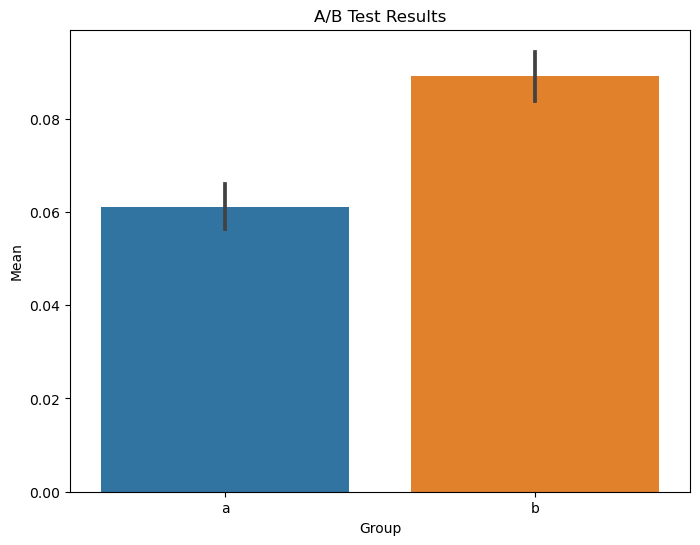

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=test_df['test_group'], 
            y=test_df['conversion'], 
            errorbar=('ci', 95)) # Confidence Intervals

plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean')

plt.show()


Для даного А/В тесту значення t-статистики = -7.5299531387344185, p-value = 2.6455288192589382e-14. Значення p-value є меншим ніж 0,05, що свідчить про значущість отриманих результатів. Отже нульову гіпотезу можна відкинути і запроваджувати зміни в продукт